In [504]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

**Directions**: Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.

In [505]:
df = pd.read_csv("bus-breakdown-and-delays.csv")

C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [506]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1212699,Special Ed AM Run,48186,N758,Other,75485,2015-09-02T06:27:00,2015-09-02T06:29:00,Nassau County,...,25 minutes,0,Yes,No,No,2015-09-02T06:29:00,NaN,2015-09-02T06:29:16,Running Late,School-Age
1,2015-2016,1212700,Special Ed AM Run,2518,L530,Mechanical Problem,21854,2015-09-02T06:24:00,2015-09-02T06:30:00,Brooklyn,...,NaN,0,Yes,Yes,Yes,2015-09-02T06:30:00,NaN,2015-09-02T06:30:19,Breakdown,School-Age
2,2015-2016,1212701,Special Ed AM Run,235,K168,Other,18366,2015-09-02T06:45:00,2015-09-02T06:47:00,Brooklyn,...,30MINS,0,Yes,Yes,No,2015-09-02T06:47:00,NaN,2015-09-02T08:05:39,Running Late,School-Age
3,2015-2016,1212703,Special Ed AM Run,2102,K216,Other,21501,2015-09-02T06:55:00,2015-09-02T07:02:00,Brooklyn,...,20 min,1,Yes,Yes,No,2015-09-02T07:02:00,NaN,2015-09-02T07:02:01,Running Late,School-Age
4,2015-2016,1212704,Special Ed AM Run,48162,N861,Mechanical Problem,75485,2015-09-02T06:55:00,2015-09-02T07:04:00,Nassau County,...,30 min,0,Yes,Yes,No,2015-09-02T07:04:00,NaN,2015-09-02T07:04:25,Running Late,School-Age


In [507]:
df.columns

Index(['School_Year', 'Busbreakdown_ID', 'Run_Type', 'Bus_No', 'Route_Number',
       'Reason', 'Schools_Serviced', 'Occurred_On', 'Created_On', 'Boro',
       'Bus_Company_Name', 'How_Long_Delayed', 'Number_Of_Students_On_The_Bus',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Incident_Number',
       'Last_Updated_On', 'Breakdown_or_Running_Late', 'School_Age_or_PreK'],
      dtype='object')

I will use the How_Long_Delayed variable as my outcome variable.

In [508]:
print("I have {} variables and {} datapoints.".format(len(df.columns), len(df.index)))

I have 21 variables and 244548 datapoints.


In [509]:
df["School_Year"].unique()

array(['2015-2016', '2019-2020', '2016-2017', '2017-2018', '2018-2019'],
      dtype=object)

The School Year variable is categorical (with 5 options from 2015 through 2019).

In [510]:
df["School_Year"].value_counts()

2017-2018    89433
2016-2017    83141
2015-2016    63184
2018-2019     8789
2019-2020        1
Name: School_Year, dtype: int64

<BarContainer object of 5 artists>

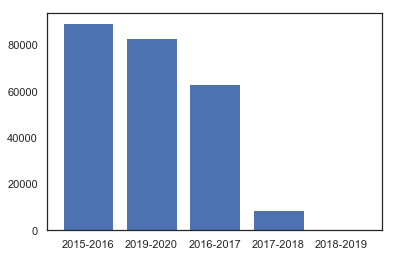

In [511]:
plt.bar(df["School_Year"].unique(), df["School_Year"].value_counts())

In [512]:
df["Busbreakdown_ID"].unique()


array([1212699, 1212700, 1212701, ..., 1465048, 1465049, 1465050],
      dtype=int64)

The Busbreakdown_ID variable is continuous (ordinal).

In [513]:
df["Run_Type"].unique()

array(['Special Ed AM Run', 'General Ed AM Run', 'Pre-K/EI',
       'Special Ed PM Run', 'General Ed PM Run', 'Special Ed Field Trip',
       'General Ed Field Trip', 'Project Read PM Run',
       'Project Read AM Run', 'Project Read Field Trip', nan],
      dtype=object)

The Run Type variable is categorical (with 10 different categories).

In [514]:
for col in df.columns:
    print(col)
    print(df[col].unique())

School_Year
['2015-2016' '2019-2020' '2016-2017' '2017-2018' '2018-2019']
Busbreakdown_ID
[1212699 1212700 1212701 ... 1465048 1465049 1465050]
Run_Type
['Special Ed AM Run' 'General Ed AM Run' 'Pre-K/EI' 'Special Ed PM Run'
 'General Ed PM Run' 'Special Ed Field Trip' 'General Ed Field Trip'
 'Project Read PM Run' 'Project Read AM Run' 'Project Read Field Trip' nan]
Bus_No
['48186' '2518' '235' ... 'C31' '0421' '5901D']
Route_Number
['N758' 'L530' 'K168' ... 'GRAM 9' 'K9735' 'M881']
Reason
['Other' 'Mechanical Problem' 'Heavy Traffic' 'Problem Run' 'Won`t Start'
 'Flat Tire' 'Weather Conditions' 'Accident' 'Delayed by School'
 'Late return from Field Trip' nan]
Schools_Serviced
['75485' '21854' '18366' ...
 '01019,01020,01034,01064,01134,01142,01184,01658'
 '01034,01063,01064,01134,01142,02397' '19460,19551,19678']
Occurred_On
['2015-09-02T06:27:00' '2015-09-02T06:24:00' '2015-09-02T06:45:00' ...
 '2018-09-28T06:03:00' '2018-09-28T06:05:00' '2018-09-28T06:06:00']
Created_On
['2015-09-

+ The Bus_No variable is continuous (ordinal).
+ The Route_Number variable is continous (ordinal).
+ The Reason variable is categorical (with 10 options).
+ The Schools_Serviced variable is continuous (ordinal).
+ The Occured_On and Created_On variables are continous (ordinal).
+ The Boro variable is categorical (with 11 categories).
+ The Bus_Company_Name variable is categorical (with 30+ categories).
+ The How_Long_Delayed and Number_Of_Students_On_The_Bus variables are continous (both are ratio variables).
+ The Has_Contractor_Notified_Schools, Has_Contractor_Notified_Parents, and Have_You_Alerted_OPT variables are all yes/no categorical.
+ The Informed_On variable is continuous (ordinal).
+ The Incident_Number is continuous (ordinal).
+ The Last_Updated_On variable is continuous (ordinal).
+ The Breakdown_or_Running_Late and School_Age_or_PreK variables are both categorical with 2 options.




In [515]:
print(np.var(df["Number_Of_Students_On_The_Bus"]))
print(np.std(df["Number_Of_Students_On_The_Bus"]))
print(np.max(df["Number_Of_Students_On_The_Bus"]))
print(np.min(df["Number_Of_Students_On_The_Bus"]))

3405.1191429342016
58.353398726502654
9052
0


In [516]:
print("Here is how much data is missing:\n", df.isna().sum())

Here is how much data is missing:
 School_Year                             0
Busbreakdown_ID                         0
Run_Type                                3
Bus_No                                  8
Route_Number                            7
Reason                                  2
Schools_Serviced                        7
Occurred_On                             0
Created_On                              0
Boro                                11536
Bus_Company_Name                        0
How_Long_Delayed                    32566
Number_Of_Students_On_The_Bus           0
Has_Contractor_Notified_Schools         0
Has_Contractor_Notified_Parents         0
Have_You_Alerted_OPT                    0
Informed_On                             0
Incident_Number                    235181
Last_Updated_On                         0
Breakdown_or_Running_Late               0
School_Age_or_PreK                      0
dtype: int64


The variables I'm going to focus on are:
+ Outcome variable: How_Long_Delayed (continuous - ratio)
+ Reason (categorical)
+ Number_Of_Students_On_The_Bus (continuous - ratio)
+ Boro (categorical)
+ Occurred_On (continuous - ordinal)
+ Schools_Serviced (continous - ordinal)

In [517]:
sns.set(style="white")

In [518]:
df_model = df.loc[:,["How_Long_Delayed", "Reason", "Number_Of_Students_On_The_Bus", "Boro", "Occurred_On", "Schools_Serviced"]]

In [519]:
df_model.head()

,How_Long_Delayed,Reason,Number_Of_Students_On_The_Bus,Boro,Occurred_On,Schools_Serviced
0,25 minutes,Other,0,Nassau County,2015-09-02T06:27:00,75485
1,NaN,Mechanical Problem,0,Brooklyn,2015-09-02T06:24:00,21854
2,30MINS,Other,0,Brooklyn,2015-09-02T06:45:00,18366
3,20 min,Other,1,Brooklyn,2015-09-02T06:55:00,21501
4,30 min,Mechanical Problem,0,Nassau County,2015-09-02T06:55:00,75485


In [520]:
print("Here is how much data is missing from my model set of variables:\n", df_model.isna().sum())

Here is how much data is missing from my model set of variables:
 How_Long_Delayed                 32566
Reason                               2
Number_Of_Students_On_The_Bus        0
Boro                             11536
Occurred_On                          0
Schools_Serviced                     7
dtype: int64


In [521]:
df_model.dtypes

How_Long_Delayed                 object
Reason                           object
Number_Of_Students_On_The_Bus     int64
Boro                             object
Occurred_On                      object
Schools_Serviced                 object
dtype: object

In [522]:
df["How_Long_Delayed"].value_counts()

16-30 Min     31329
31-45 Min     25762
46-60 Min     11925
0-15 Min      11500
20 MINS        5730
30 MINS        4688
30 minutes     3757
61-90 Min      3623
15 mins        3538
30MINS         3207
20 mins        3170
20 min         2940
30 min         2928
15 MINS        2853
20 MIN         2624
30 MIN         2539
20             2499
15MINS         1989
30 mins        1903
15 minutes     1787
45 MIN         1785
25 MIN         1746
45 MINS        1716
20-30 min      1570
25 MINS        1540
10 mins        1472
30mins         1371
15 min         1315
45MINS         1297
20mins         1267
              ...  
6 mis             1
5 Min             1
9 mnutes          1
30. min           1
115 minute        1
30 mns            1
1hr/????mi        1
25-20 MINS        1
2228              1
451HR             1
25  mins          1
15/20INS          1
3.5min            1
23MIN             1
10-12mins         1
15 minns          1
35MIONS           1
9568              1
1 HOUIR           1


In [523]:
df_model[df_model["How_Long_Delayed"].isna()]

,How_Long_Delayed,Reason,Number_Of_Students_On_The_Bus,Boro,Occurred_On,Schools_Serviced
1,NaN,Mechanical Problem,0,Brooklyn,2015-09-02T06:24:00,21854
5,NaN,Mechanical Problem,0,Westchester,2015-09-02T07:05:00,75871
6,NaN,Heavy Traffic,0,Manhattan,2015-09-02T07:12:00,17703
14,NaN,Heavy Traffic,0,Manhattan,2015-09-08T07:44:00,03408
17,NaN,Won`t Start,0,Bronx,2015-09-25T06:41:00,12469
21,NaN,Heavy Traffic,0,Brooklyn,2015-09-08T07:45:00,75003
36,NaN,Mechanical Problem,0,Bronx,2015-09-25T06:39:00,10008
44,NaN,Mechanical Problem,0,Manhattan,2015-09-09T07:13:00,03867
55,NaN,Heavy Traffic,0,NaN,2015-09-25T06:38:00,13369
58,NaN,Heavy Traffic,0,Staten Island,2015-09-25T06:39:00,31009


In [524]:
df_model = df_model.dropna()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

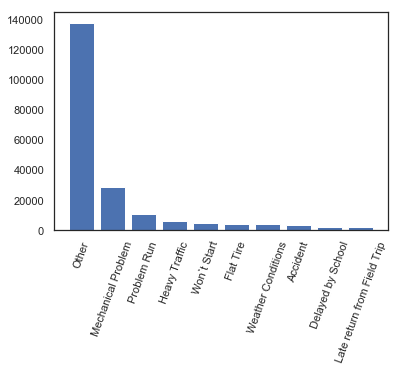

In [525]:
plt.bar(df_model["Reason"].unique(), df_model["Reason"].value_counts())
plt.xticks(rotation=70)

In [526]:
example1 = "30 MINS"

print([int(h) for h in example1.split() if h.isdigit()])

example2 = "30-40 minutes"

print([int(e) for e in list(example2) if e.isdigit()])

example2.split()
list(example2)

[30]
[3, 0, 4, 0]


['3', '0', '-', '4', '0', ' ', 'm', 'i', 'n', 'u', 't', 'e', 's']

In [527]:
def Minutes_Delayed(c):
    for h in c["How_Long_Delayed"].split():
        if h.isdigit():
            return int(h)


In [528]:
df_model["Minutes_Delayed"] = df_model.apply(Minutes_Delayed, axis=1)

In [529]:
df_model.head()

,How_Long_Delayed,Reason,Number_Of_Students_On_The_Bus,Boro,Occurred_On,Schools_Serviced,Minutes_Delayed
0,25 minutes,Other,0,Nassau County,2015-09-02T06:27:00,75485,25.0
2,30MINS,Other,0,Brooklyn,2015-09-02T06:45:00,18366,NaN
3,20 min,Other,1,Brooklyn,2015-09-02T06:55:00,21501,20.0
4,30 min,Mechanical Problem,0,Nassau County,2015-09-02T06:55:00,75485,30.0
7,90 MIN,Problem Run,9,Brooklyn,2015-09-02T07:19:00,"17685,17858",90.0


In [530]:
df_model["Minutes_Delayed"].value_counts()

20.0       19095
30.0       18426
15.0       11548
25.0        7002
45.0        6222
10.0        4898
1.0         2883
40.0        1833
35.0        1603
60.0        1566
5.0          470
90.0         267
50.0         171
120.0        150
2.0          120
55.0          98
0.0           86
3.0           84
12.0          62
8.0           58
6.0           49
7.0           48
80.0          37
11.0          33
4.0           31
9.0           28
14.0          26
13.0          23
16.0          21
24.0          19
           ...  
10456.0        1
2601.0         1
1300.0         1
2587.0         1
1376.0         1
10311.0        1
450.0          1
3596.0         1
2557.0         1
445.0          1
1256.0         1
10512.0        1
915.0          1
2640.0         1
104.0          1
2759.0         1
56.0           1
43.0           1
1375.0         1
1369.0         1
1366.0         1
117.0          1
29.0           1
150.0          1
1349.0         1
1346.0         1
1337.0         1
2653.0        

In [531]:
df_model[df_model["Minutes_Delayed"] > 99]

,How_Long_Delayed,Reason,Number_Of_Students_On_The_Bus,Boro,Occurred_On,Schools_Serviced,Minutes_Delayed
267,1419,Heavy Traffic,1,Manhattan,2015-09-16T07:12:00,02124,1419.0
540,120 MIN,Heavy Traffic,4,Manhattan,2015-09-11T06:35:00,01001,120.0
591,182,Heavy Traffic,3,Westchester,2015-09-10T07:44:00,75615,182.0
856,10456,Heavy Traffic,7,Queens,2015-09-28T07:55:00,"28447,28449",10456.0
1303,300 MINS,Mechanical Problem,5,Brooklyn,2015-09-22T07:55:00,17005,300.0
1347,187,Heavy Traffic,6,Westchester,2015-09-24T08:18:00,75847,187.0
2286,1603,Heavy Traffic,2,Manhattan,2015-11-06T06:53:00,03475,1603.0
2302,1425,Heavy Traffic,2,Manhattan,2015-11-06T06:59:00,02035,1425.0
2870,105 MINS,Other,0,Bronx,2015-11-09T05:40:00,07697,105.0
3001,1448,Heavy Traffic,4,Manhattan,2015-11-09T07:26:00,02347,1448.0


In [532]:
df_model = df_model.drop(df_model[df_model["Minutes_Delayed"] > 120].index)

In [533]:
df_model[df_model["Minutes_Delayed"] > 99]

,How_Long_Delayed,Reason,Number_Of_Students_On_The_Bus,Boro,Occurred_On,Schools_Serviced,Minutes_Delayed
540,120 MIN,Heavy Traffic,4,Manhattan,2015-09-11T06:35:00,01001,120.0
2870,105 MINS,Other,0,Bronx,2015-11-09T05:40:00,07697,105.0
3057,100,Accident,1,Brooklyn,2015-11-13T07:00:00,19601,100.0
3647,120 mins,Other,0,Queens,2015-09-21T07:43:00,30502,120.0
4788,104,Heavy Traffic,3,Westchester,2015-09-09T08:25:00,75847,104.0
5431,120,Heavy Traffic,4,Manhattan,2015-09-17T07:08:00,01001,120.0
5678,120,Heavy Traffic,2,Manhattan,2015-09-16T07:10:00,01001,120.0
7225,120 mins,Mechanical Problem,2,Manhattan,2016-02-01T07:17:00,03480,120.0
7400,120 mins,Mechanical Problem,0,Queens,2016-02-01T07:59:00,24721,120.0
8330,120 mins,Heavy Traffic,0,Queens,2016-02-04T07:20:00,24721,120.0


In [534]:
df_model["Minutes_Delayed"].value_counts()

20.0     19095
30.0     18426
15.0     11548
25.0      7002
45.0      6222
10.0      4898
1.0       2883
40.0      1833
35.0      1603
60.0      1566
5.0        470
90.0       267
50.0       171
120.0      150
2.0        120
55.0        98
0.0         86
3.0         84
12.0        62
8.0         58
6.0         49
7.0         48
80.0        37
11.0        33
4.0         31
9.0         28
14.0        26
13.0        23
16.0        21
17.0        19
24.0        19
23.0        18
22.0        14
21.0        10
75.0         7
65.0         6
100.0        6
27.0         4
31.0         4
18.0         4
19.0         3
26.0         3
28.0         3
115.0        2
34.0         2
51.0         2
32.0         1
70.0         1
43.0         1
57.0         1
105.0        1
37.0         1
104.0        1
59.0         1
42.0         1
41.0         1
56.0         1
29.0         1
117.0        1
39.0         1
Name: Minutes_Delayed, dtype: int64

In [535]:
df_model.loc[df_model["Minutes_Delayed"] == 1, "Minutes_Delayed"] = 60

In [536]:
df_model[df_model["Minutes_Delayed"] == 60]

,How_Long_Delayed,Reason,Number_Of_Students_On_The_Bus,Boro,Occurred_On,Schools_Serviced,Minutes_Delayed
53,1 hr,Won`t Start,0,Bronx,2015-09-25T05:55:00,11519,60.0
54,60 mins,Other,2,Brooklyn,2015-09-25T07:02:00,14031,60.0
170,1 hour,Heavy Traffic,5,Queens,2015-09-10T16:59:00,C518,60.0
249,60 MINS,Mechanical Problem,0,Brooklyn,2015-09-16T06:52:00,22490,60.0
263,1 HOUR 15M,Other,0,Brooklyn,2015-09-16T07:00:00,15003,60.0
359,1 HOUR,Accident,5,Bronx,2015-09-11T08:34:00,C195,60.0
392,60 MIN,Heavy Traffic,2,Brooklyn,2015-09-16T07:48:00,22533,60.0
403,1 hour,Other,2,Queens,2015-09-16T14:35:00,26187,60.0
419,1 hr,Mechanical Problem,0,Brooklyn,2015-09-17T07:05:00,14459,60.0
506,60 min,Delayed by School,0,Brooklyn,2015-09-10T14:45:00,17397,60.0


In [537]:
df_model["Minutes_Delayed"].unique()

array([ 25.,  nan,  20.,  30.,  90.,  15.,   0.,  10.,  60.,  45.,  40.,
         5.,  35.,  80.,   3.,  22.,   6.,  12., 120.,   7.,   8.,   2.,
        24.,  18.,  13., 105., 100.,  16.,  50.,  23.,  43.,  59., 104.,
        55.,  26.,   9.,   4.,  17.,  65.,  14.,  19.,  28.,  75.,  27.,
        11., 115.,  21.,  31.,  70.,  41.,  51.,  56.,  34.,  29.,  57.,
        39., 117.,  32.,  37.,  42.])

In [538]:
len(df_model.index)

201426

In [539]:
df_model["Number_Of_Students_On_The_Bus"].unique()

array([   0,    1,    9,    2,    3,    4,   15,    6,    8,   30,    7,
         17,    5,   11,   12,   10,   13,   20,   14,   23,   16, 1465,
         50,   18,   52,   22,   21,   19,  207,   25,   27, 1011, 1472,
         47, 1371,   76,   51,   26,  102, 1401,   46,   28,   40,   36,
         24,   29,   35,   37,  430,   32, 4533,   33, 5554,   45,   48,
         49,   43, 2844,   39,   41, 2680,   31,   65, 1329,   34,   60,
       1331,   91, 1402, 1434,   38, 1492, 1424,   44,   42, 3112, 1420,
       1352, 1315, 1749, 1449, 1384, 1500,  500, 2368,  156, 9007, 2154,
       2312,   55,  138,  280,   63, 6219, 1240,   66,   53, 2085,   54,
        105, 2905,  209,  157,  172, 2365,   58, 1177,   81,  612,  109,
        331, 2855, 1411, 5718, 2327, 1307, 2301,   67, 5586, 4570,  871,
       2314, 2710, 2570,  145, 1378,  822, 1005, 2185, 1330,   57,  129,
       2814,  216,  404, 5546, 1156, 2458, 1347, 2632,  198, 2857, 1557,
        824,   82, 1258, 9052, 1050,  536,  570, 25

In [540]:
df_model["Number_Of_Students_On_The_Bus"].value_counts()

0       115090
2        12497
3        11646
1        11224
4         9528
5         9461
6         6127
7         5131
8         4356
10        3222
9         3084
11        1917
12        1869
13        1114
15        1033
14         798
16         485
20         371
18         353
17         306
25         251
30         214
19         185
22         162
21          96
40          88
35          79
23          63
24          58
28          49
         ...  
4533         1
822          1
1330         1
430          1
2365         1
2301         1
9007         1
1449         1
3112         1
5546         1
2857         1
570          1
61           1
207          1
6219         1
588          1
2509         1
76           1
843          1
331          1
2632         1
198          1
62           1
69           1
1347         1
67           1
2368         1
1472         1
63           1
172          1
Name: Number_Of_Students_On_The_Bus, Length: 175, dtype: int64

In [541]:
df_model = df_model.drop(df_model[df_model["Number_Of_Students_On_The_Bus"] > 70].index)

In [542]:
df_model["Number_Of_Students_On_The_Bus"].value_counts()

0     115090
2      12497
3      11646
1      11224
4       9528
5       9461
6       6127
7       5131
8       4356
10      3222
9       3084
11      1917
12      1869
13      1114
15      1033
14       798
16       485
20       371
18       353
17       306
25       251
30       214
19       185
22       162
21        96
40        88
35        79
23        63
24        58
28        49
       ...  
33        27
36        16
31        13
44        12
42        12
38        12
37        11
41        10
43        10
34        10
48         9
55         8
52         7
60         6
46         6
53         6
47         5
49         5
54         4
51         3
39         3
65         3
57         2
66         2
63         1
67         1
62         1
61         1
58         1
69         1
Name: Number_Of_Students_On_The_Bus, Length: 66, dtype: int64

In [543]:
df_model["Hour"] = pd.to_datetime(df["Occurred_On"]).dt.hour

In [544]:
df_model.head()

,How_Long_Delayed,Reason,Number_Of_Students_On_The_Bus,Boro,Occurred_On,Schools_Serviced,Minutes_Delayed,Hour
0,25 minutes,Other,0,Nassau County,2015-09-02T06:27:00,75485,25.0,6
2,30MINS,Other,0,Brooklyn,2015-09-02T06:45:00,18366,NaN,6
3,20 min,Other,1,Brooklyn,2015-09-02T06:55:00,21501,20.0,6
4,30 min,Mechanical Problem,0,Nassau County,2015-09-02T06:55:00,75485,30.0,6
7,90 MIN,Problem Run,9,Brooklyn,2015-09-02T07:19:00,"17685,17858",90.0,7


In [545]:
corrmat = df_model.corr()
print(corrmat)

                               Number_Of_Students_On_The_Bus  Minutes_Delayed  \
Number_Of_Students_On_The_Bus                       1.000000        -0.131067   
Minutes_Delayed                                    -0.131067         1.000000   
Hour                                               -0.031640         0.024645   

                                   Hour  
Number_Of_Students_On_The_Bus -0.031640  
Minutes_Delayed                0.024645  
Hour                           1.000000  


C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


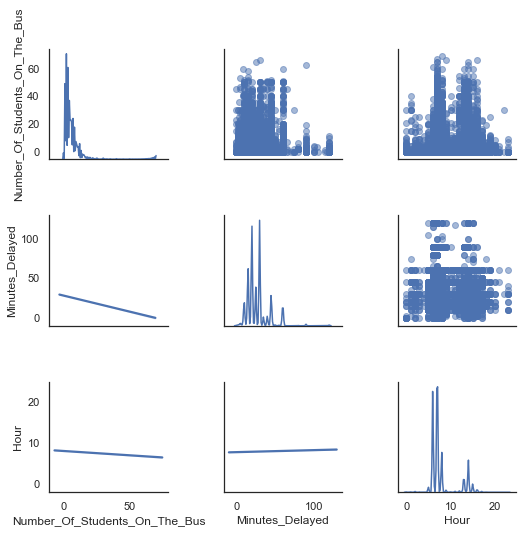

In [546]:
g = sns.PairGrid(df_model, diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot)

In [547]:
df_long = df_model.loc[:, ["Reason", "Minutes_Delayed"]]
df_long = pd.melt(df_long, id_vars = ["Reason"])

df_long.head(15)

,Reason,variable,value
0,Other,Minutes_Delayed,25.0
1,Other,Minutes_Delayed,NaN
2,Other,Minutes_Delayed,20.0
3,Mechanical Problem,Minutes_Delayed,30.0
4,Problem Run,Minutes_Delayed,90.0
5,Other,Minutes_Delayed,20.0
6,Heavy Traffic,Minutes_Delayed,20.0
7,Heavy Traffic,Minutes_Delayed,30.0
8,Heavy Traffic,Minutes_Delayed,15.0
9,Other,Minutes_Delayed,20.0


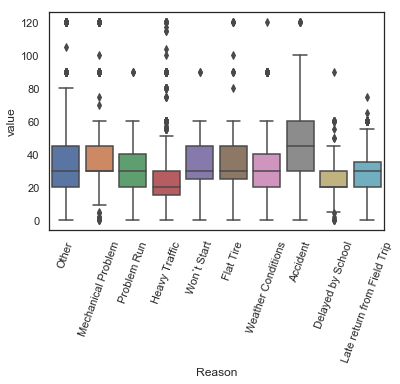

In [548]:
sns.boxplot(data = df_long, x = "Reason", y = "value")
plt.xticks(rotation=70)
plt.show()

In [549]:
df_bar = pd.DataFrame()
df_bar["Reason"] = df_model["Reason"]
df_bar.index = df_model["Boro"]

df_bar.head()

,Reason
Boro,
Nassau County,Other
Brooklyn,Other
Brooklyn,Other
Nassau County,Mechanical Problem
Brooklyn,Problem Run


In [550]:
df_bar.index.unique()

Index(['Nassau County', 'Brooklyn', 'Manhattan', 'Queens', 'Westchester',
       'Staten Island', 'Bronx', 'Rockland County', 'New Jersey',
       'All Boroughs', 'Connecticut'],
      dtype='object', name='Boro')

In [551]:
df_bar.groupby("Boro")["Reason"].value_counts()


Boro             Reason                     
All Boroughs     Heavy Traffic                    278
                 Weather Conditions                42
                 Flat Tire                         15
                 Other                              8
                 Mechanical Problem                 7
                 Accident                           1
                 Late return from Field Trip        1
                 Problem Run                        1
                 Won`t Start                        1
Bronx            Heavy Traffic                  39734
                 Other                           6218
                 Weather Conditions              2139
                 Mechanical Problem              1542
                 Late return from Field Trip     1299
                 Flat Tire                        850
                 Won`t Start                      502
                 Accident                         465
                 Delayed by School   

In [552]:
df_count = pd.DataFrame()
df_count["Heavy Traffic"] = df_bar.loc[df_bar["Reason"] == "Heavy Traffic"].groupby("Boro")["Reason"].value_counts()
df_count["Other"] = df_bar.loc[df_bar["Reason"] == "Other"].groupby("Boro")["Reason"].value_counts()
#df_count["Heavy Traffic"] = df_bar.loc[df_bar["Reason"] == "Heavy Traffic"].groupby("Boro").value_counts()
#df_count.columns = df_model["Reason"].unique() 
#df_count.index = df_model["Boro"].unique()

df_count.head(40)
df_count.columns

Index(['Heavy Traffic', 'Other'], dtype='object')

In [553]:
df_count.head(20)

,,Heavy Traffic,Other
Boro,Reason,,
All Boroughs,Heavy Traffic,278,NaN
Bronx,Heavy Traffic,39734,NaN
Brooklyn,Heavy Traffic,21273,NaN
Connecticut,Heavy Traffic,143,NaN
Manhattan,Heavy Traffic,41249,NaN
Nassau County,Heavy Traffic,1653,NaN
New Jersey,Heavy Traffic,1062,NaN
Queens,Heavy Traffic,14557,NaN
Rockland County,Heavy Traffic,679,NaN


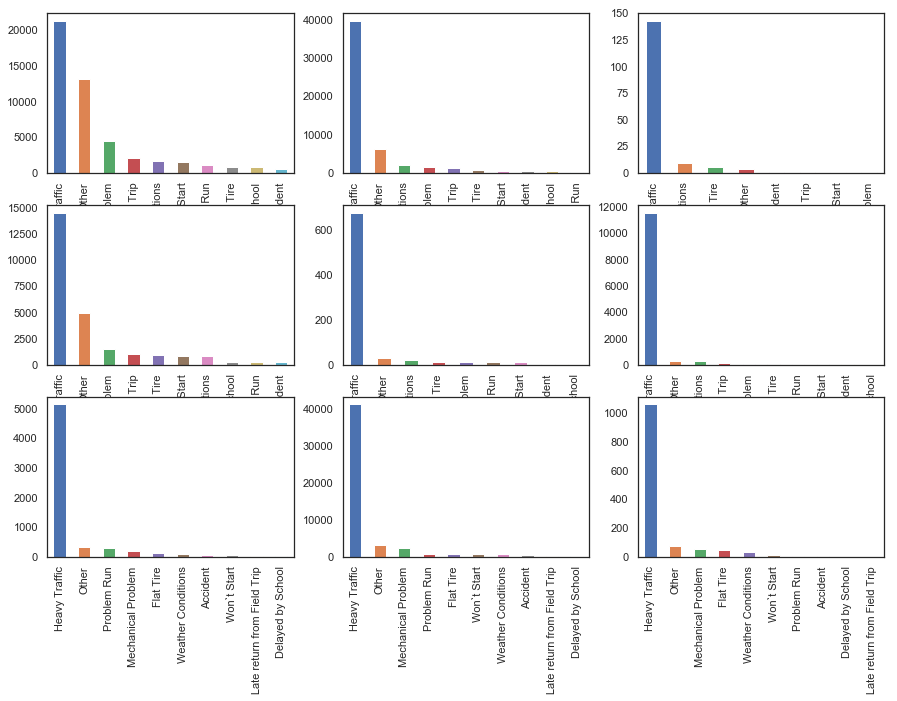

In [554]:
plt.subplots(3,3, sharey=True, sharex=True, figsize=(15,10))
ax1 = plt.subplot(331)
ax1 = df_model[df_model["Boro"] == "Brooklyn"]["Reason"].value_counts().plot(kind="bar")
ax2 = plt.subplot(332)
ax2 = df_model[df_model["Boro"] == "Bronx"]["Reason"].value_counts().plot(kind="bar")
ax3 = plt.subplot(333)
ax3 = df_model[df_model["Boro"] == "Connecticut"]["Reason"].value_counts().plot(kind="bar")
ax4 = plt.subplot(334)
ax4 = df_model[df_model["Boro"] == "Queens"]["Reason"].value_counts().plot(kind="bar")
ax5 = plt.subplot(335)
ax5 = df_model[df_model["Boro"] == "Rockland County"]["Reason"].value_counts().plot(kind="bar")
ax6 = plt.subplot(336)
ax6 = df_model[df_model["Boro"] == "Staten Island"]["Reason"].value_counts().plot(kind="bar")
ax7 = plt.subplot(337)
ax7 = df_model[df_model["Boro"] == "Westchester"]["Reason"].value_counts().plot(kind="bar")
ax8 = plt.subplot(338)
ax8 = df_model[df_model["Boro"] == "Manhattan"]["Reason"].value_counts().plot(kind="bar")
ax9 = plt.subplot(339)
ax9 = df_model[df_model["Boro"] == "New Jersey"]["Reason"].value_counts().plot(kind="bar")


#ax1.plot(height=df_bar.loc[df_bar["Boro"] == "Brooklyn"].groupby("Reason")["Reason"].value_counts(), kind="bar")



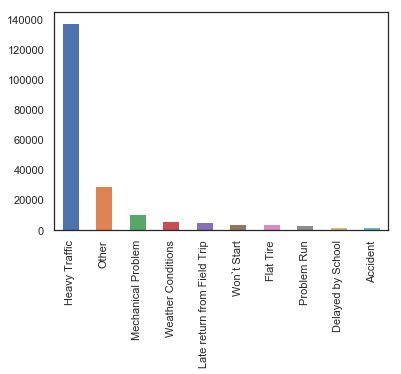

In [555]:
df_bar["Reason"].value_counts().plot(kind="bar")

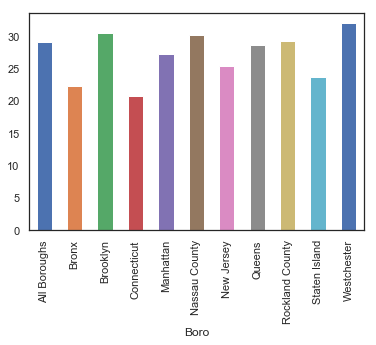

In [556]:
df_model.groupby("Boro")["Minutes_Delayed"].mean().plot(kind="bar")

In [557]:
def fullness(c):
    if c["Number_Of_Students_On_The_Bus"] <= 5:
        return 1
    elif 5 < c["Number_Of_Students_On_The_Bus"] <= 25:
        return 2
    elif c["Number_Of_Students_On_The_Bus"] > 25:
        return 3
    else:
        return "Undefined"
    
df_model["Fullness"] = df_model.apply(fullness, axis=1)

In [558]:
df_model.head(30)

,How_Long_Delayed,Reason,Number_Of_Students_On_The_Bus,Boro,Occurred_On,Schools_Serviced,Minutes_Delayed,Hour,Fullness
0,25 minutes,Other,0,Nassau County,2015-09-02T06:27:00,75485,25.0,6,1
2,30MINS,Other,0,Brooklyn,2015-09-02T06:45:00,18366,NaN,6,1
3,20 min,Other,1,Brooklyn,2015-09-02T06:55:00,21501,20.0,6,1
4,30 min,Mechanical Problem,0,Nassau County,2015-09-02T06:55:00,75485,30.0,6,1
7,90 MIN,Problem Run,9,Brooklyn,2015-09-02T07:19:00,"17685,17858",90.0,7,2
8,20 MINS,Other,0,Brooklyn,2015-09-02T07:40:00,17005,20.0,7,1
9,20,Heavy Traffic,2,Manhattan,2015-09-02T07:45:00,02202,20.0,7,1
10,30 mins,Heavy Traffic,3,Nassau County,2015-09-02T07:55:00,75627,30.0,7,1
11,15 MINS,Heavy Traffic,3,Queens,2015-09-02T07:59:00,28695,15.0,7,1
12,20 MIN,Other,4,Queens,2015-09-02T07:55:00,28328,20.0,7,1


In [559]:
features = pd.DataFrame()

features["Minutes_Delayed"] = df_model["Minutes_Delayed"]
features["Hour"] = df_model["Hour"]
features["Fullness"] = df_model["Fullness"]

In [560]:
features.head()

,Minutes_Delayed,Hour,Fullness
0,25.0,6,1
2,NaN,6,1
3,20.0,6,1
4,30.0,6,1
7,90.0,7,2


In [561]:
reasons = pd.get_dummies(df_model["Reason"])

In [562]:
reasons.head()

,Accident,Delayed by School,Flat Tire,Heavy Traffic,Late return from Field Trip,Mechanical Problem,Other,Problem Run,Weather Conditions,Won`t Start
0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0


In [563]:
frames = [features, reasons]

features = pd.concat(frames)

C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


In [564]:
features.head()

,Accident,Delayed by School,Flat Tire,Fullness,Heavy Traffic,Hour,Late return from Field Trip,Mechanical Problem,Minutes_Delayed,Other,Problem Run,Weather Conditions,Won`t Start
0,NaN,NaN,NaN,1.0,NaN,6.0,NaN,NaN,25.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,1.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1.0,NaN,6.0,NaN,NaN,20.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1.0,NaN,6.0,NaN,NaN,30.0,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,2.0,NaN,7.0,NaN,NaN,90.0,NaN,NaN,NaN,NaN


In [565]:
reasons["Minutes_Delayed"] = df_model["Minutes_Delayed"]
reasons["Hour"] = df_model["Hour"]
reasons["Fullness"] = df_model["Fullness"]

In [566]:
reasons.head()

,Accident,Delayed by School,Flat Tire,Heavy Traffic,Late return from Field Trip,Mechanical Problem,Other,Problem Run,Weather Conditions,Won`t Start,Minutes_Delayed,Hour,Fullness
0,0,0,0,0,0,0,1,0,0,0,25.0,6,1
2,0,0,0,0,0,0,1,0,0,0,NaN,6,1
3,0,0,0,0,0,0,1,0,0,0,20.0,6,1
4,0,0,0,0,0,1,0,0,0,0,30.0,6,1
7,0,0,0,0,0,0,0,1,0,0,90.0,7,2


In [567]:
features = reasons
del features["Other"]

In [568]:
features.head()

,Accident,Delayed by School,Flat Tire,Heavy Traffic,Late return from Field Trip,Mechanical Problem,Problem Run,Weather Conditions,Won`t Start,Minutes_Delayed,Hour,Fullness
0,0,0,0,0,0,0,0,0,0,25.0,6,1
2,0,0,0,0,0,0,0,0,0,NaN,6,1
3,0,0,0,0,0,0,0,0,0,20.0,6,1
4,0,0,0,0,0,1,0,0,0,30.0,6,1
7,0,0,0,0,0,0,1,0,0,90.0,7,2


In [569]:
for col in features.columns[0:10]:
    print(col)
    print(sum(features[col]))

Accident
1807
Delayed by School
1815
Flat Tire
3716
Heavy Traffic
137351
Late return from Field Trip
4902
Mechanical Problem
10455
Problem Run
2958
Weather Conditions
5720
Won`t Start
3789
Minutes_Delayed
nan


In [596]:
def amount_of_traffic(c):
    if c["Hour"] == 7:
        return 2
    elif c["Hour"] == 8:
        return 2    
    elif c["Hour"] == 4:
        return 2
    elif c["Hour"] == 5:
        return 2
    else:
        return 1
    
features["Rush_Hour_Traffic"] = df_model.apply(amount_of_traffic, axis=1)
del features["Amount_Of_Traffic"]

In [597]:
features.head()

,Accident,Delayed by School,Flat Tire,Heavy Traffic,Late return from Field Trip,Mechanical Problem,Problem Run,Weather Conditions,Won`t Start,Hour,Fullness,Traffic_And_Fullness,Boro,Boro_Number,Flat Tire By Boro,Heavy Traffic By Boro,Minutes_Delayed,Rush_Hour_Traffic
0,0,0,0,0,0,0,0,0,0,6,1,1,Nassau County,6,0,0,25.0,1
2,0,0,0,0,0,0,0,0,0,6,1,1,Brooklyn,3,0,0,NaN,1
3,0,0,0,0,0,0,0,0,0,6,1,1,Brooklyn,3,0,0,20.0,1
4,0,0,0,0,0,1,0,0,0,6,1,1,Nassau County,6,0,0,30.0,1
7,0,0,0,0,0,0,1,0,0,7,2,4,Brooklyn,3,0,0,90.0,2


In [598]:
features["Traffic_And_Fullness"] = features["Rush_Hour_Traffic"] * features["Fullness"]

In [599]:
features.head()

,Accident,Delayed by School,Flat Tire,Heavy Traffic,Late return from Field Trip,Mechanical Problem,Problem Run,Weather Conditions,Won`t Start,Hour,Fullness,Traffic_And_Fullness,Boro,Boro_Number,Flat Tire By Boro,Heavy Traffic By Boro,Minutes_Delayed,Rush_Hour_Traffic
0,0,0,0,0,0,0,0,0,0,6,1,1,Nassau County,6,0,0,25.0,1
2,0,0,0,0,0,0,0,0,0,6,1,1,Brooklyn,3,0,0,NaN,1
3,0,0,0,0,0,0,0,0,0,6,1,1,Brooklyn,3,0,0,20.0,1
4,0,0,0,0,0,1,0,0,0,6,1,1,Nassau County,6,0,0,30.0,1
7,0,0,0,0,0,0,1,0,0,7,2,4,Brooklyn,3,0,0,90.0,2


In [574]:
features["Boro"] = df_model["Boro"]

In [575]:
boros = pd.get_dummies(df_model["Boro"])


In [576]:
boros.head()

,All Boroughs,Bronx,Brooklyn,Connecticut,Manhattan,Nassau County,New Jersey,Queens,Rockland County,Staten Island,Westchester
0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,0


In [577]:
for col in boros.columns:
    print(col)
    print(sum(boros[col]))

All Boroughs
354
Bronx
53560
Brooklyn
47343
Connecticut
166
Manhattan
50576
Nassau County
2765
New Jersey
1286
Queens
25511
Rockland County
780
Staten Island
12583
Westchester
6368


In [578]:
#features.reset_index(drop=True, inplace=True)
#boros.reset_index(drop=True, inplace=True)

#frames = [features, boros]

#features = pd.concat(frames, sort=False)

In [579]:
features.head()

,Accident,Delayed by School,Flat Tire,Heavy Traffic,Late return from Field Trip,Mechanical Problem,Problem Run,Weather Conditions,Won`t Start,Minutes_Delayed,Hour,Fullness,Amount_Of_Traffic,Traffic_And_Fullness,Boro
0,0,0,0,0,0,0,0,0,0,25.0,6,1,1,1,Nassau County
2,0,0,0,0,0,0,0,0,0,NaN,6,1,1,1,Brooklyn
3,0,0,0,0,0,0,0,0,0,20.0,6,1,1,1,Brooklyn
4,0,0,0,0,0,1,0,0,0,30.0,6,1,1,1,Nassau County
7,0,0,0,0,0,0,1,0,0,90.0,7,2,2,4,Brooklyn


In [581]:
features.head()

,Accident,Delayed by School,Flat Tire,Heavy Traffic,Late return from Field Trip,Mechanical Problem,Problem Run,Weather Conditions,Won`t Start,Minutes_Delayed,Hour,Fullness,Amount_Of_Traffic,Traffic_And_Fullness,Boro
0,0,0,0,0,0,0,0,0,0,25.0,6,1,1,1,Nassau County
2,0,0,0,0,0,0,0,0,0,NaN,6,1,1,1,Brooklyn
3,0,0,0,0,0,0,0,0,0,20.0,6,1,1,1,Brooklyn
4,0,0,0,0,0,1,0,0,0,30.0,6,1,1,1,Nassau County
7,0,0,0,0,0,0,1,0,0,90.0,7,2,2,4,Brooklyn


In [582]:
def boro_numbers(c):
    for boro in str(c["Boro"]):
        if str(c["Boro"]) == boros.columns[0]:
            return 1
        elif str(c["Boro"]) == boros.columns[1]:
            return 2
        elif str(c["Boro"]) == boros.columns[2]:
            return 3
        elif str(c["Boro"]) == boros.columns[3]:
            return 4
        elif str(c["Boro"]) == boros.columns[4]:
            return 5
        elif str(c["Boro"]) == boros.columns[5]:
            return 6
        elif str(c["Boro"]) == boros.columns[6]:
            return 7
        elif str(c["Boro"]) == boros.columns[7]:
            return 8
        elif str(c["Boro"]) == boros.columns[8]:
            return 9
        elif str(c["Boro"]) == boros.columns[10]:
            return 11
        else:
            return 0
        

    

In [583]:
features["Boro_Number"] = features.apply(boro_numbers, axis=1)

In [584]:
features.head(10)

,Accident,Delayed by School,Flat Tire,Heavy Traffic,Late return from Field Trip,Mechanical Problem,Problem Run,Weather Conditions,Won`t Start,Minutes_Delayed,Hour,Fullness,Amount_Of_Traffic,Traffic_And_Fullness,Boro,Boro_Number
0,0,0,0,0,0,0,0,0,0,25.0,6,1,1,1,Nassau County,6
2,0,0,0,0,0,0,0,0,0,NaN,6,1,1,1,Brooklyn,3
3,0,0,0,0,0,0,0,0,0,20.0,6,1,1,1,Brooklyn,3
4,0,0,0,0,0,1,0,0,0,30.0,6,1,1,1,Nassau County,6
7,0,0,0,0,0,0,1,0,0,90.0,7,2,2,4,Brooklyn,3
8,0,0,0,0,0,0,0,0,0,20.0,7,1,2,2,Brooklyn,3
9,0,0,0,1,0,0,0,0,0,20.0,7,1,2,2,Manhattan,5
10,0,0,0,1,0,0,0,0,0,30.0,7,1,2,2,Nassau County,6
11,0,0,0,1,0,0,0,0,0,15.0,7,1,2,2,Queens,8
12,0,0,0,0,0,0,0,0,0,20.0,7,1,2,2,Queens,8


In [585]:
features["Flat Tire By Boro"] = features["Flat Tire"] * features["Boro_Number"]

In [586]:
features["Heavy Traffic By Boro"] = features["Heavy Traffic"] * features["Boro_Number"]

In [587]:
features.head(15)

,Accident,Delayed by School,Flat Tire,Heavy Traffic,Late return from Field Trip,Mechanical Problem,Problem Run,Weather Conditions,Won`t Start,Minutes_Delayed,Hour,Fullness,Amount_Of_Traffic,Traffic_And_Fullness,Boro,Boro_Number,Flat Tire By Boro,Heavy Traffic By Boro
0,0,0,0,0,0,0,0,0,0,25.0,6,1,1,1,Nassau County,6,0,0
2,0,0,0,0,0,0,0,0,0,NaN,6,1,1,1,Brooklyn,3,0,0
3,0,0,0,0,0,0,0,0,0,20.0,6,1,1,1,Brooklyn,3,0,0
4,0,0,0,0,0,1,0,0,0,30.0,6,1,1,1,Nassau County,6,0,0
7,0,0,0,0,0,0,1,0,0,90.0,7,2,2,4,Brooklyn,3,0,0
8,0,0,0,0,0,0,0,0,0,20.0,7,1,2,2,Brooklyn,3,0,0
9,0,0,0,1,0,0,0,0,0,20.0,7,1,2,2,Manhattan,5,0,5
10,0,0,0,1,0,0,0,0,0,30.0,7,1,2,2,Nassau County,6,0,6
11,0,0,0,1,0,0,0,0,0,15.0,7,1,2,2,Queens,8,0,8
12,0,0,0,0,0,0,0,0,0,20.0,7,1,2,2,Queens,8,0,0


In [600]:
del features["Minutes_Delayed"]

In [601]:
features["Minutes_Delayed"] = df_model["Minutes_Delayed"]

In [590]:
counttable = pd.crosstab(features["Boro"], features["Heavy Traffic"])
print(counttable)

Heavy Traffic        0      1
Boro                         
All Boroughs        76    278
Bronx            13826  39734
Brooklyn         26070  21273
Connecticut         23    143
Manhattan         9327  41249
Nassau County     1112   1653
New Jersey         224   1062
Queens           10954  14557
Rockland County    101    679
Staten Island     1008  11575
Westchester       1220   5148


In [592]:
print(stats.chisquare(counttable, axis=None))

Power_divergenceResult(statistic=366076.2314448661, pvalue=0.0)


In [591]:
corrmat = features.corr()
print(corrmat)

                             Accident  Delayed by School  Flat Tire  \
Accident                     1.000000          -0.009079  -0.013053   
Delayed by School           -0.009079           1.000000  -0.013082   
Flat Tire                   -0.013053          -0.013082   1.000000   
Heavy Traffic               -0.139492          -0.139804  -0.201000   
Late return from Field Trip -0.015037          -0.015070  -0.021667   
Mechanical Problem          -0.022277          -0.022327  -0.032100   
Problem Run                 -0.011623          -0.011649  -0.016748   
Weather Conditions          -0.016277          -0.016313  -0.023454   
Won`t Start                 -0.013183          -0.013212  -0.018995   
Hour                         0.074086           0.101325   0.005261   
Fullness                     0.012926           0.066049  -0.047722   
Amount_Of_Traffic           -0.020864          -0.026106  -0.055845   
Traffic_And_Fullness        -0.007337           0.028065  -0.062004   
Boro_N

explained variance
look at one column and see the range in minutes delayed; keep the ones with the most variation

In [593]:
import sklearn as sk

In [602]:
features.head()

,Accident,Delayed by School,Flat Tire,Heavy Traffic,Late return from Field Trip,Mechanical Problem,Problem Run,Weather Conditions,Won`t Start,Hour,Fullness,Traffic_And_Fullness,Boro,Boro_Number,Flat Tire By Boro,Heavy Traffic By Boro,Rush_Hour_Traffic,Minutes_Delayed
0,0,0,0,0,0,0,0,0,0,6,1,1,Nassau County,6,0,0,1,25.0
2,0,0,0,0,0,0,0,0,0,6,1,1,Brooklyn,3,0,0,1,NaN
3,0,0,0,0,0,0,0,0,0,6,1,1,Brooklyn,3,0,0,1,20.0
4,0,0,0,0,0,1,0,0,0,6,1,1,Nassau County,6,0,0,1,30.0
7,0,0,0,0,0,0,1,0,0,7,2,4,Brooklyn,3,0,0,2,90.0


In [604]:
from sklearn.metrics import explained_variance_score
y_true = features["Delayed by School"]
y_pred = features["Fullness"]
explained_variance_score(y_true, y_pred)

-15.661427771363154

In [610]:
features.dropna()

,Accident,Delayed by School,Flat Tire,Heavy Traffic,Late return from Field Trip,Mechanical Problem,Problem Run,Weather Conditions,Won`t Start,Hour,Fullness,Traffic_And_Fullness,Boro,Boro_Number,Flat Tire By Boro,Heavy Traffic By Boro,Rush_Hour_Traffic,Minutes_Delayed
0,0,0,0,0,0,0,0,0,0,6,1,1,Nassau County,6,0,0,1,25.0
3,0,0,0,0,0,0,0,0,0,6,1,1,Brooklyn,3,0,0,1,20.0
4,0,0,0,0,0,1,0,0,0,6,1,1,Nassau County,6,0,0,1,30.0
7,0,0,0,0,0,0,1,0,0,7,2,4,Brooklyn,3,0,0,2,90.0
8,0,0,0,0,0,0,0,0,0,7,1,2,Brooklyn,3,0,0,2,20.0
9,0,0,0,1,0,0,0,0,0,7,1,2,Manhattan,5,0,5,2,20.0
10,0,0,0,1,0,0,0,0,0,7,1,2,Nassau County,6,0,6,2,30.0
11,0,0,0,1,0,0,0,0,0,7,1,2,Queens,8,0,8,2,15.0
12,0,0,0,0,0,0,0,0,0,7,1,2,Queens,8,0,0,2,20.0
13,0,0,0,1,0,0,0,0,0,8,1,2,Westchester,11,0,11,2,15.0


In [612]:
y_true = features["Delayed by School"]
y_pred = features["Boro_Number"]
explained_variance_score(y_true, y_pred)

-711.4586173560109

In [615]:
#this is the closest to 1 I got

y_true = features["Hour"]
y_pred = features["Boro_Number"]
explained_variance_score(y_true, y_pred)

-0.7296757551463173

In [616]:
y_true = features["Delayed by School"]
y_pred = features["Delayed by School"]
explained_variance_score(y_true, y_pred)

1.0

In [617]:
y_true = features["Rush_Hour_Traffic"]
y_pred = features["Hour"]
explained_variance_score(y_true, y_pred)

-37.23367181486221

In [618]:
for col in features.columns:
    y_true = features["Hour"]
    y_pred = features[col]
    print("With", col)
    print(explained_variance_score(y_true, y_pred))

With Accident
0.003770751221544688
With Delayed by School
0.005558595807574673
With Flat Tire
-0.0016794334780156905
With Heavy Traffic
-0.053654299117167126
With Late return from Field Trip
0.026159507989458874
With Mechanical Problem
-0.006152032828535603
With Problem Run
-0.004094330509447408
With Weather Conditions
-0.008789841027656342
With Won`t Start
-0.004931126105415684
With Hour
1.0
With Fullness
-0.02541542271263908
With Traffic_And_Fullness
-0.2686867515011919
With Boro


ValueError: could not convert string to float: 'Manhattan'

In [620]:
for col in features.columns:
    y_true = features["Heavy Traffic"]
    y_pred = features[col]
    print("With", col)
    print(explained_variance_score(y_true, y_pred))

With Accident
-2654.5191812155176
With Delayed by School
-2666.1638346493773
With Flat Tire
-5406.355257127995
With Heavy Traffic
1.0
With Late return from Field Trip
-7088.804260430903
With Mechanical Problem
-14689.16869973184
With Problem Run
-4320.152982860583
With Weather Conditions
-8237.074506375428
With Won`t Start
-5510.5139762234085
With Hour
-39.59984384942606
With Fullness
-0.6134730521726894
With Traffic_And_Fullness
-4.279918063429856
With Boro


ValueError: could not convert string to float: 'Manhattan'

In [621]:
features.head()

,Accident,Delayed by School,Flat Tire,Heavy Traffic,Late return from Field Trip,Mechanical Problem,Problem Run,Weather Conditions,Won`t Start,Hour,Fullness,Traffic_And_Fullness,Boro,Boro_Number,Flat Tire By Boro,Heavy Traffic By Boro,Rush_Hour_Traffic,Minutes_Delayed
0,0,0,0,0,0,0,0,0,0,6,1,1,Nassau County,6,0,0,1,25.0
2,0,0,0,0,0,0,0,0,0,6,1,1,Brooklyn,3,0,0,1,NaN
3,0,0,0,0,0,0,0,0,0,6,1,1,Brooklyn,3,0,0,1,20.0
4,0,0,0,0,0,1,0,0,0,6,1,1,Nassau County,6,0,0,1,30.0
7,0,0,0,0,0,0,1,0,0,7,2,4,Brooklyn,3,0,0,2,90.0


In [624]:
features[features["Accident"] == 1]["Minutes_Delayed"].min()
features[features["Accident"] == 1]["Minutes_Delayed"].max()

120.0

In [628]:
min_val = features[features["Boro_Number"] == 1]["Minutes_Delayed"].min()
max_val = features[features["Boro_Number"] == 1]["Minutes_Delayed"].max()
print(max_val - min_val)

min_val = features[features["Boro_Number"] == 2]["Minutes_Delayed"].min()
max_val = features[features["Boro_Number"] == 2]["Minutes_Delayed"].max()
print(max_val - min_val)

min_val = features[features["Boro_Number"] == 3]["Minutes_Delayed"].min()
max_val = features[features["Boro_Number"] == 3]["Minutes_Delayed"].max()
print(max_val - min_val)

min_val = features[features["Boro_Number"] == 4]["Minutes_Delayed"].min()
max_val = features[features["Boro_Number"] == 4]["Minutes_Delayed"].max()
print(max_val - min_val)

min_val = features[features["Boro_Number"] == 5]["Minutes_Delayed"].min()
max_val = features[features["Boro_Number"] == 5]["Minutes_Delayed"].max()
print(max_val - min_val)

min_val = features[features["Boro_Number"] == 6]["Minutes_Delayed"].min()
max_val = features[features["Boro_Number"] == 6]["Minutes_Delayed"].max()
print(max_val - min_val)

min_val = features[features["Boro_Number"] == 7]["Minutes_Delayed"].min()
max_val = features[features["Boro_Number"] == 7]["Minutes_Delayed"].max()
print(max_val - min_val)

min_val = features[features["Boro_Number"] == 8]["Minutes_Delayed"].min()
max_val = features[features["Boro_Number"] == 8]["Minutes_Delayed"].max()
print(max_val - min_val)

min_val = features[features["Boro_Number"] == 9]["Minutes_Delayed"].min()
max_val = features[features["Boro_Number"] == 9]["Minutes_Delayed"].max()
print(max_val - min_val)

min_val = features[features["Boro_Number"] == 10]["Minutes_Delayed"].min()
max_val = features[features["Boro_Number"] == 10]["Minutes_Delayed"].max()
print(max_val - min_val)

min_val = features[features["Boro_Number"] == 11]["Minutes_Delayed"].min()
max_val = features[features["Boro_Number"] == 11]["Minutes_Delayed"].max()
print(max_val - min_val)


30.0
120.0
120.0
35.0
120.0
90.0
58.0
120.0
85.0
nan
104.0


In [625]:
for var in features.iloc[0:8]:
    min_val = features[features[var] == 1]["Minutes_Delayed"].min()
    max_val = features[features[var] == 1]["Minutes_Delayed"].max() 
    print(var)
    print("Min:", min_val)
    print("Max:", max_val)
    print("Range", max_val - min_val)

Accident
Min: 0.0
Max: 120.0
Range 120.0
Delayed by School
Min: 0.0
Max: 90.0
Range 90.0
Flat Tire
Min: 0.0
Max: 120.0
Range 120.0
Heavy Traffic
Min: 0.0
Max: 120.0
Range 120.0
Late return from Field Trip
Min: 0.0
Max: 75.0
Range 75.0
Mechanical Problem
Min: 0.0
Max: 120.0
Range 120.0
Problem Run
Min: 0.0
Max: 90.0
Range 90.0
Weather Conditions
Min: 0.0
Max: 120.0
Range 120.0
Won`t Start
Min: 0.0
Max: 90.0
Range 90.0
Hour
Min: 2.0
Max: 75.0
Range 73.0
Fullness
Min: 0.0
Max: 120.0
Range 120.0
Traffic_And_Fullness
Min: 0.0
Max: 120.0
Range 120.0
Boro
Min: nan
Max: nan
Range nan
Boro_Number
Min: 15.0
Max: 45.0
Range 30.0
Flat Tire By Boro
Min: 45.0
Max: 45.0
Range 0.0
Heavy Traffic By Boro
Min: 15.0
Max: 30.0
Range 15.0
Rush_Hour_Traffic
Min: 0.0
Max: 120.0
Range 120.0
Minutes_Delayed
Min: nan
Max: nan
Range nan


In [634]:

selected_features = features.iloc[:, 0:8]
#selected_features = features[["Rush_Hour_Traffic", "Hour", "Fullness", "Heavy Traffic By Boro", "Minutes_Delayed"]]

In [635]:
selected_features.head()

,Accident,Delayed by School,Flat Tire,Heavy Traffic,Late return from Field Trip,Mechanical Problem,Problem Run,Weather Conditions
0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,1,0


In [ ]:
selected_features["Rush_Hour_Traffic"] = features["Rush_Hour_Traffic"]
selected_features["Hour"] = features["Hour"]
selected_features["Fullness"] = features["Fullness"]
selected_features["Heavy Traffic By Boro"] = features["Heavy Traffic By Boro"]